In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

Wed Dec 26 2018 

CPython 3.6.6
IPython 6.5.0

numpy 1.15.1
scipy 1.1.0
sklearn 0.19.1
pandas 0.23.4

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.9.0-7-amd64
machine    : x86_64
processor  : 
CPU cores  : 12
interpreter: 64bit


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nolds
import data
import mne

from lib.nolitsa.nolitsa import surrogates
from scipy.stats import ks_2samp
from measures.algorithms import compute_lyapunov

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
DATA_ROOT = os.path.abspath(os.path.join(PROJ_ROOT, 'data'))
PROCESSED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'processed'))
RAW_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'raw'))
LABELED_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'labeled'))
DURATIONS_ROOT = os.path.abspath(os.path.join(DATA_ROOT, 'durations'))
print(PROJ_ROOT)
print(DATA_ROOT)
print(PROCESSED_ROOT)
import sys
sys.path.append(os.path.join(PROJ_ROOT, 'src'))
CHANNEL_NAMES = ['FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
                 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
META_COLUMN_NAMES = ['freq', 'RESP_4W', 'RESP_FIN', 'REMISE_FIN', 'AGE', 'SEX', 'M_1',
       'M_4', 'M_F', 'délka léčby', 'lék 1', 'lék 2', 'lék 3', 'lék 4']
META_FILE_NAME = 'DEP-POOL_Final_144.xlsx'
meta_df = pd.read_excel(os.path.join(RAW_ROOT, META_FILE_NAME), index_col='ID', names=META_COLUMN_NAMES)

patient = 1
trial = 'a'
raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, f'{patient}'+trial+'.fif'))
t = pd.DataFrame(raw_fif.get_data())
data = pd.DataFrame(np.transpose(t.values), columns=CHANNEL_NAMES)
# data = np.transpose(data.values)
data

/home/kovar/thesis_project
/home/kovar/thesis_project/data
/home/kovar/thesis_project/data/processed
Opening raw data file /home/kovar/thesis_project/data/processed/1a.fif...
This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
Isotrak not found
    Range : 0 ... 19104 =      0.000 ...    76.416 secs
Ready.


<ipython-input-2-0dbe8e39584a>:35: RuntimeWarning: This filename (/home/kovar/thesis_project/data/processed/1a.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz or raw_tsss.fif.gz
  raw_fif = mne.io.read_raw_fif(os.path.join(PROCESSED_ROOT, f'{patient}'+trial+'.fif'))


,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,Fz,Cz,Pz
0,-1.221245e-15,0.000000,3.330669e-16,-1.110223e-15,-4.440892e-16,-8.881784e-16,-9.436896e-16,-1.110223e-16,-1.942890e-16,9.992007e-16,1.776357e-15,-1.332268e-15,4.440892e-16,-1.165734e-15,-4.440892e-16,8.881784e-16,-2.220446e-16,0.000000,-6.661338e-16
1,3.072355e-02,0.003912,1.750654e-03,-1.596277e-02,-2.130602e-02,-1.098726e-02,-2.008086e-03,-8.261942e-03,8.063222e-03,-6.077731e-03,-4.005073e-03,-1.612351e-02,1.212978e-02,5.522702e-03,1.634297e-02,4.460721e-03,1.728301e-03,0.001827,-1.729553e-03
2,1.912868e-02,0.002794,2.550935e-03,-1.010058e-02,-1.417866e-02,-6.918641e-03,-1.708755e-03,-5.014620e-03,4.928580e-03,-3.502376e-03,-2.201645e-03,-9.700077e-03,7.333987e-03,3.200909e-03,9.918219e-03,2.847482e-03,1.024030e-03,0.000909,-1.309515e-03
3,-1.858800e-02,-0.000916,7.364567e-03,9.424205e-03,7.853506e-03,5.471116e-03,-4.696314e-04,4.880521e-03,-3.726810e-03,5.058216e-03,3.309309e-03,1.055402e-02,-8.135312e-03,-4.880238e-03,-1.030976e-02,-2.630385e-03,-1.961727e-03,-0.002362,6.597942e-05
4,-2.868148e-02,0.003455,4.041720e-02,1.536080e-02,-5.273685e-03,2.251212e-03,-5.093813e-03,5.402738e-03,1.665674e-03,1.275438e-02,6.556899e-03,1.771849e-02,-1.498997e-02,-1.280113e-02,-1.568271e-02,-4.501220e-03,-7.454037e-03,-0.008324,-2.782611e-03
5,1.042028e-02,0.034658,1.640122e-01,-3.721588e-04,-1.090139e-01,-4.056969e-02,-2.932803e-02,-1.292538e-02,4.275822e-02,3.012721e-02,8.719349e-03,9.087741e-03,-1.282211e-02,-2.718794e-02,3.139001e-03,-9.638081e-05,-2.380737e-02,-0.027922,-1.887755e-02
6,7.144931e-02,0.128086,4.716028e-01,-1.140856e-02,-3.578478e-01,-1.524137e-01,-9.359508e-02,-5.096937e-02,1.517641e-01,9.964322e-02,1.632860e-02,2.168162e-02,-3.283821e-02,-7.067157e-02,2.754778e-02,4.103888e-03,-7.260861e-02,-0.088766,-6.108844e-02
7,1.406756e-01,0.346227,9.857883e-01,1.934630e-02,-8.008678e-01,-3.956199e-01,-2.135303e-01,-1.169848e-01,3.948368e-01,2.903071e-01,1.749872e-02,1.046199e-01,-1.167866e-01,-1.554748e-01,4.844415e-02,-1.347056e-03,-1.813170e-01,-0.225032,-1.407850e-01
8,2.666182e-01,0.756711,1.438679e+00,1.078984e-01,-1.389105e+00,-8.620907e-01,-3.640667e-01,-2.292907e-01,8.644227e-01,6.725866e-01,-4.881901e-02,2.825453e-01,-2.878886e-01,-2.402528e-01,1.039469e-01,-2.270694e-02,-3.597136e-01,-0.443225,-2.462499e-01
9,5.014518e-01,1.350580,1.116636e+00,2.341503e-01,-1.806236e+00,-1.595451e+00,-4.335892e-01,-3.820647e-01,1.606534e+00,1.276795e+00,-2.903420e-01,5.364298e-01,-5.389386e-01,-2.182304e-01,2.680245e-01,-6.633686e-02,-5.723438e-01,-0.675740,-3.113296e-01


In [13]:
df = pd.read_pickle(os.path.join(LABELED_ROOT, 'lyap_10_3_50.pkl'))
# df.columns = df.columns.droplevel(1)
for row in df.iterrows():
    print(row[0])
    break

(1, 'a')


In [81]:
def plot_sigma(channel_name, surr_stats, true_stat, statname=r'$\lambda_1$'):
    plt.figure(1)
    plt.title(f'{channel_name}')
    plt.xlabel(statname)
    plt.vlines(surr_stats, 0.0, 0.5, label='surrogate')
    plt.vlines(true_stat, 0.0, 1.0, color='red', label='true')
    plt.legend()
    plt.show()

In [82]:
def compute_sigma(x, true_stat, f=compute_lyapunov):
    surr_sers = [surrogates.iaaft(x)[0] for _ in range(19)]
    surr_stats = [f(surr) for surr in surr_sers]
    return np.abs(np.mean(surr_stats)-true_stat) / np.std(surr_stats), surr_stats

PATIENT 1, TRIAL: a


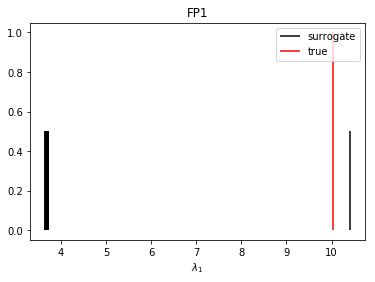

FP1 : 3.9986488201044263


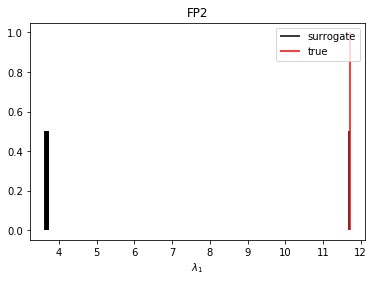

FP2 : 4.252317010879219


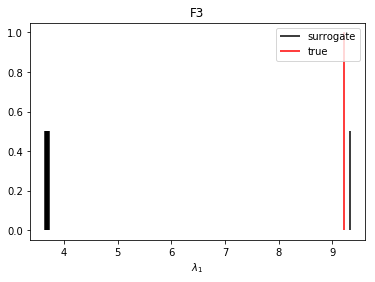

F3 : 4.161044533820693


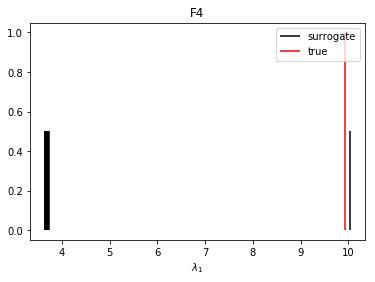

F4 : 4.180620721988594


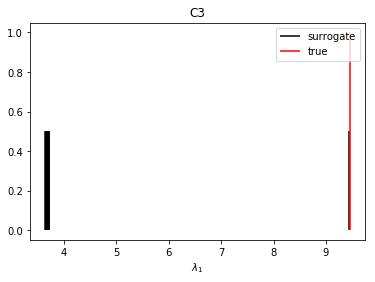

C3 : 4.253166593143353


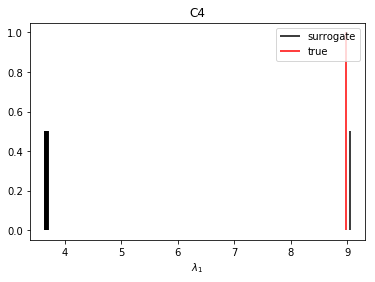

C4 : 4.183028553640848


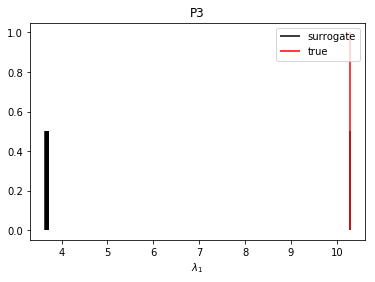

P3 : 4.2431439824421


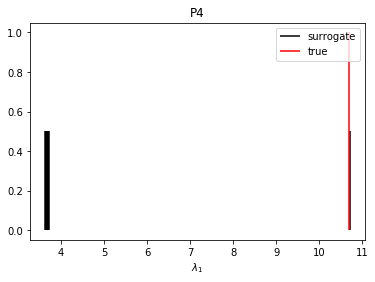

P4 : 4.237646120814107


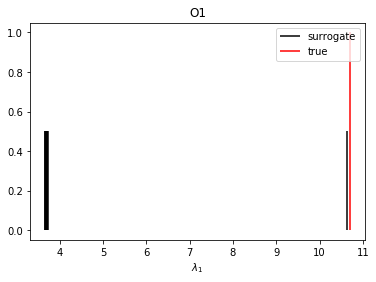

O1 : 4.284354989413664


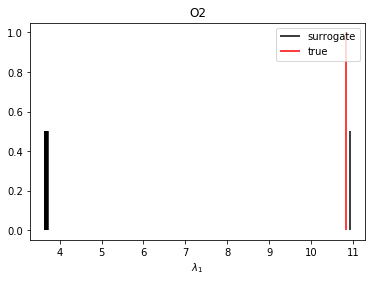

O2 : 4.187903401067727


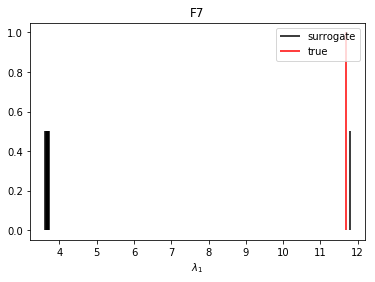

F7 : 4.195142530863191


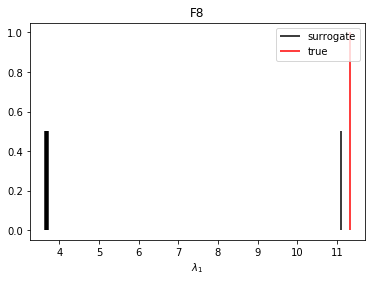

F8 : 4.373611124734425


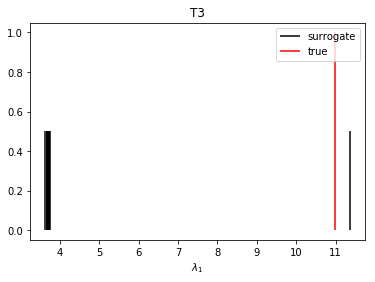

T3 : 4.022269893385472


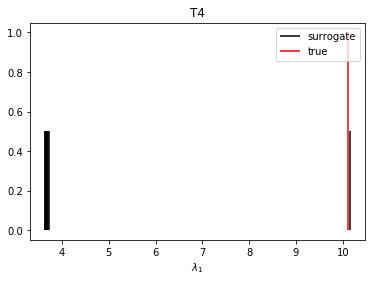

T4 : 4.223987367148436


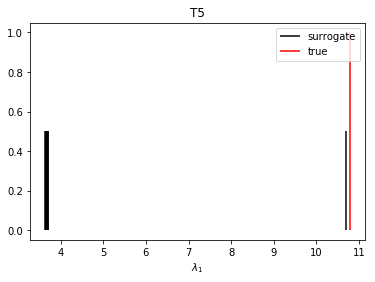

T5 : 4.295166603788091


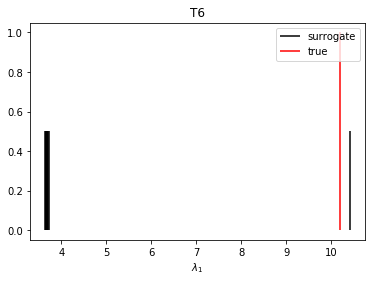

T6 : 4.1043166081188245


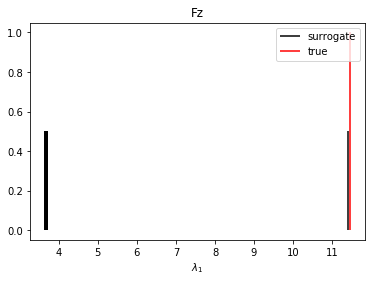

Fz : 4.269423273694218


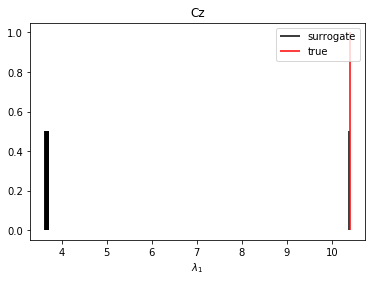

Cz : 4.252222399282494


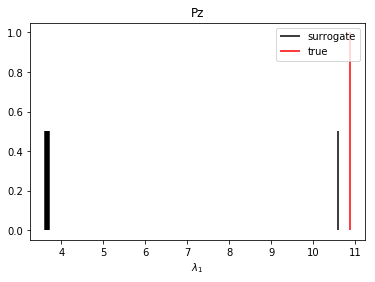

Pz : 4.425915803910732


In [83]:
print(f'PATIENT {patient}, TRIAL: {trial}')
for channel_name in data.columns:
    chan_data = data.loc[:, channel_name][:15000]
    true_stat = df.loc[(patient, trial), channel_name]
    sigma, surr_stats = compute_sigma(chan_data, true_stat)
    plot_sigma(channel_name, surr_stats, true_stat)
    print(f'{channel_name} : {sigma}')